# ism3d.xyhelper.maskmoment: derive moment0/moment1 maps from spectral cubes


note: 
This example was adapted from https://github.com/tonywong94/maskmoment, hat tip to T. Wong & H. Wang

## Setup

We first import essential API functions / modules from `ism3d` and other libraries

**Used ISM3D Functions:**

* `im3d.logger.logger_config`
* `im3d.logger.logger_status`

In [9]:
nb_dir=_dh[0]
os.chdir(nb_dir+'/../output/n4047')
sys.path.append(nb_dir)
from notebook_setup import *

%matplotlib inline
#%config InlineBackend.figure_format = "png" #  ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%reload_ext wurlitzer
%reload_ext memory_profiler
%reload_ext line_profiler

ism3d.logger_config(logfile='ism3d.log',loglevel='DEBUG',logfilelevel='DEBUG',log2term=False)

print(''+ism3d.__version__)
print('working dir: {}\n'.format(os.getcwd()))

0.3.dev1
working dir: /Users/Rui/Resilio/Workspace/projects/ism3d/models/output/n4047



In [2]:
def quadplot(basename, extmask=None):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))
    mom0 = fits.getdata(basename+'.mom0.fits.gz')
    ax1.imshow(mom0,origin='lower',cmap='CMRmap')
    ax1.set_title(basename+' - Moment 0',fontsize='x-large')
    mom1 = fits.getdata(basename+'.mom1.fits.gz')
    ax2.imshow(mom1,origin='lower',cmap='jet')
    ax2.set_title(basename+' - Moment 1',fontsize='x-large')
    mom2 = fits.getdata(basename+'.mom2.fits.gz')
    ax3.imshow(mom2,origin='lower',cmap='CMRmap')
    ax3.set_title(basename+' - Moment 2',fontsize='x-large')
    if extmask is None:
        mask = np.sum(fits.getdata(basename+'.mask.fits.gz'),axis=0)
    else:
        mask = np.sum(fits.getdata(extmask),axis=0)
    ax4.imshow(mask,origin='lower',cmap='CMRmap_r')
    ax4.set_title('Projected Mask',fontsize='x-large')
    plt.subplots_adjust(hspace=0.15,wspace=0.15)
    plt.show()
    return

## Example 0: Dilated mask with no smoothing.  Expand from 4$\sigma$ to 2$\sigma$ contour.  Mask regions must span at least 2 beam areas and 2 channels at any pixel.


Output basename is: NGC4047.co.dilmsk
Image cube ../../data/n4047/NGC4047.co.smo7msk.fits.gz:
SpectralCube with shape=(44, 128, 128) and unit=Jy / beam:
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 deg
 n_s:     44  type_s: VRAD      unit_s: m / s  range:  2980000.000 m / s: 3840000.000 m / s
Gain cube ../../data/n4047/NGC4047.co.smo7gain.fits.gz:
SpectralCube with shape=(44, 128, 128):
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 deg
 n_s:     44  type_s: VRAD      unit_s: m / s  range:  2980000.000 m / s: 3840000.000 m / s
Found rms value of 0.0120 Jy / beam
Noise cube:
SpectralCube with shape=(44, 128, 128) and unit=Jy / beam:
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_

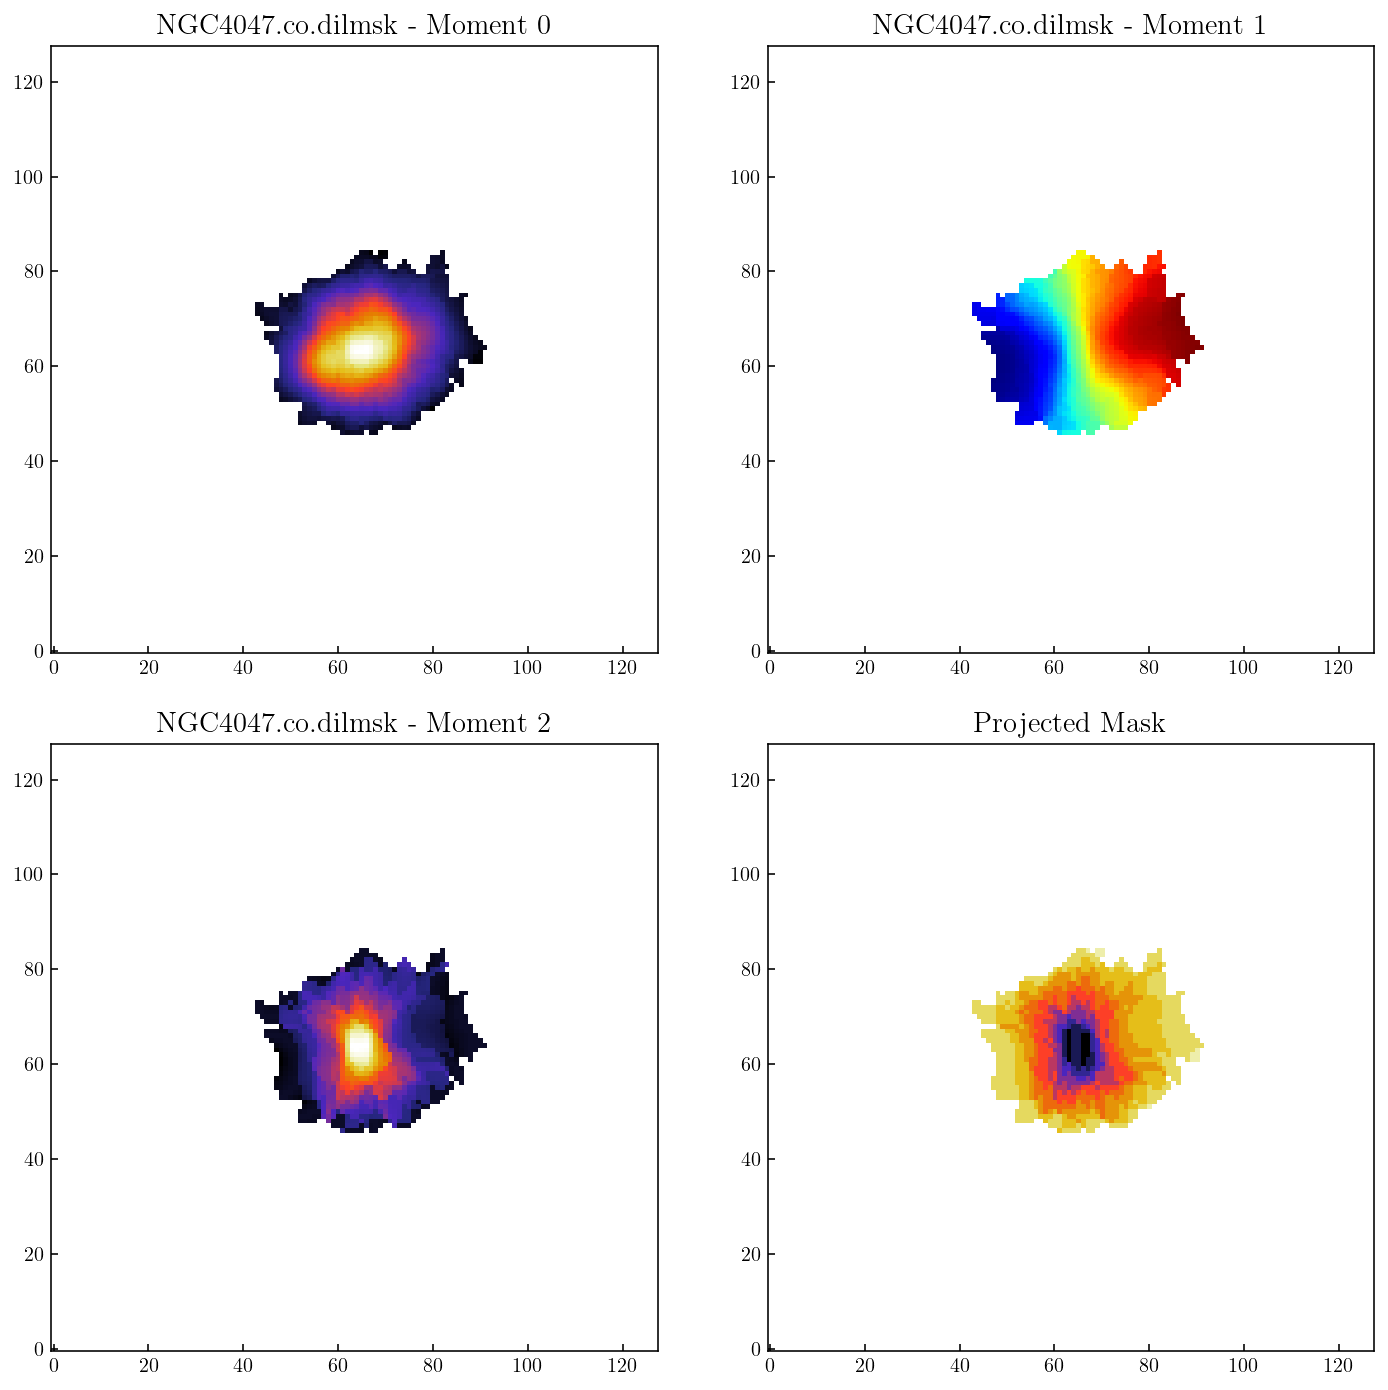

In [3]:
img_fits='../../data/n4047/NGC4047.co.smo7msk.fits.gz'
gain_fits='../../data/n4047/NGC4047.co.smo7gain.fits.gz'
maskmoment(img_fits=img_fits, 
           gain_fits=gain_fits,
           snr_hi=4, snr_lo=2, minbeam=2, snr_lo_minch=2,
           outname='NGC4047.co.dilmsk',outdir='./')
quadplot('NGC4047.co.dilmsk')
rms_fits=outname='NGC4047.co.dilmsk.ecube.fits.gz'

## Example 1: Dilated mask with 2 pixel padding in spatial dimensions.  Start at 5$\sigma$ contour to isolate main galaxy.  We speed up execution by using the rms cube generated by Example 0.


Output basename is: NGC4047.co.dilmskpad
Image cube ../../data/n4047/NGC4047.co.smo7msk.fits.gz:
SpectralCube with shape=(44, 128, 128) and unit=Jy / beam:
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 deg
 n_s:     44  type_s: VRAD      unit_s: m / s  range:  2980000.000 m / s: 3840000.000 m / s
Noise cube NGC4047.co.dilmsk.ecube.fits.gz:
SpectralCube with shape=(44, 128, 128) and unit=Jy / beam:
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 deg
 n_s:     44  type_s: VRAD      unit_s: m / s  range:  2980000.000 m / s: 3840000.000 m / s
SNR cube:
SpectralCube with shape=(44, 128, 128):
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414

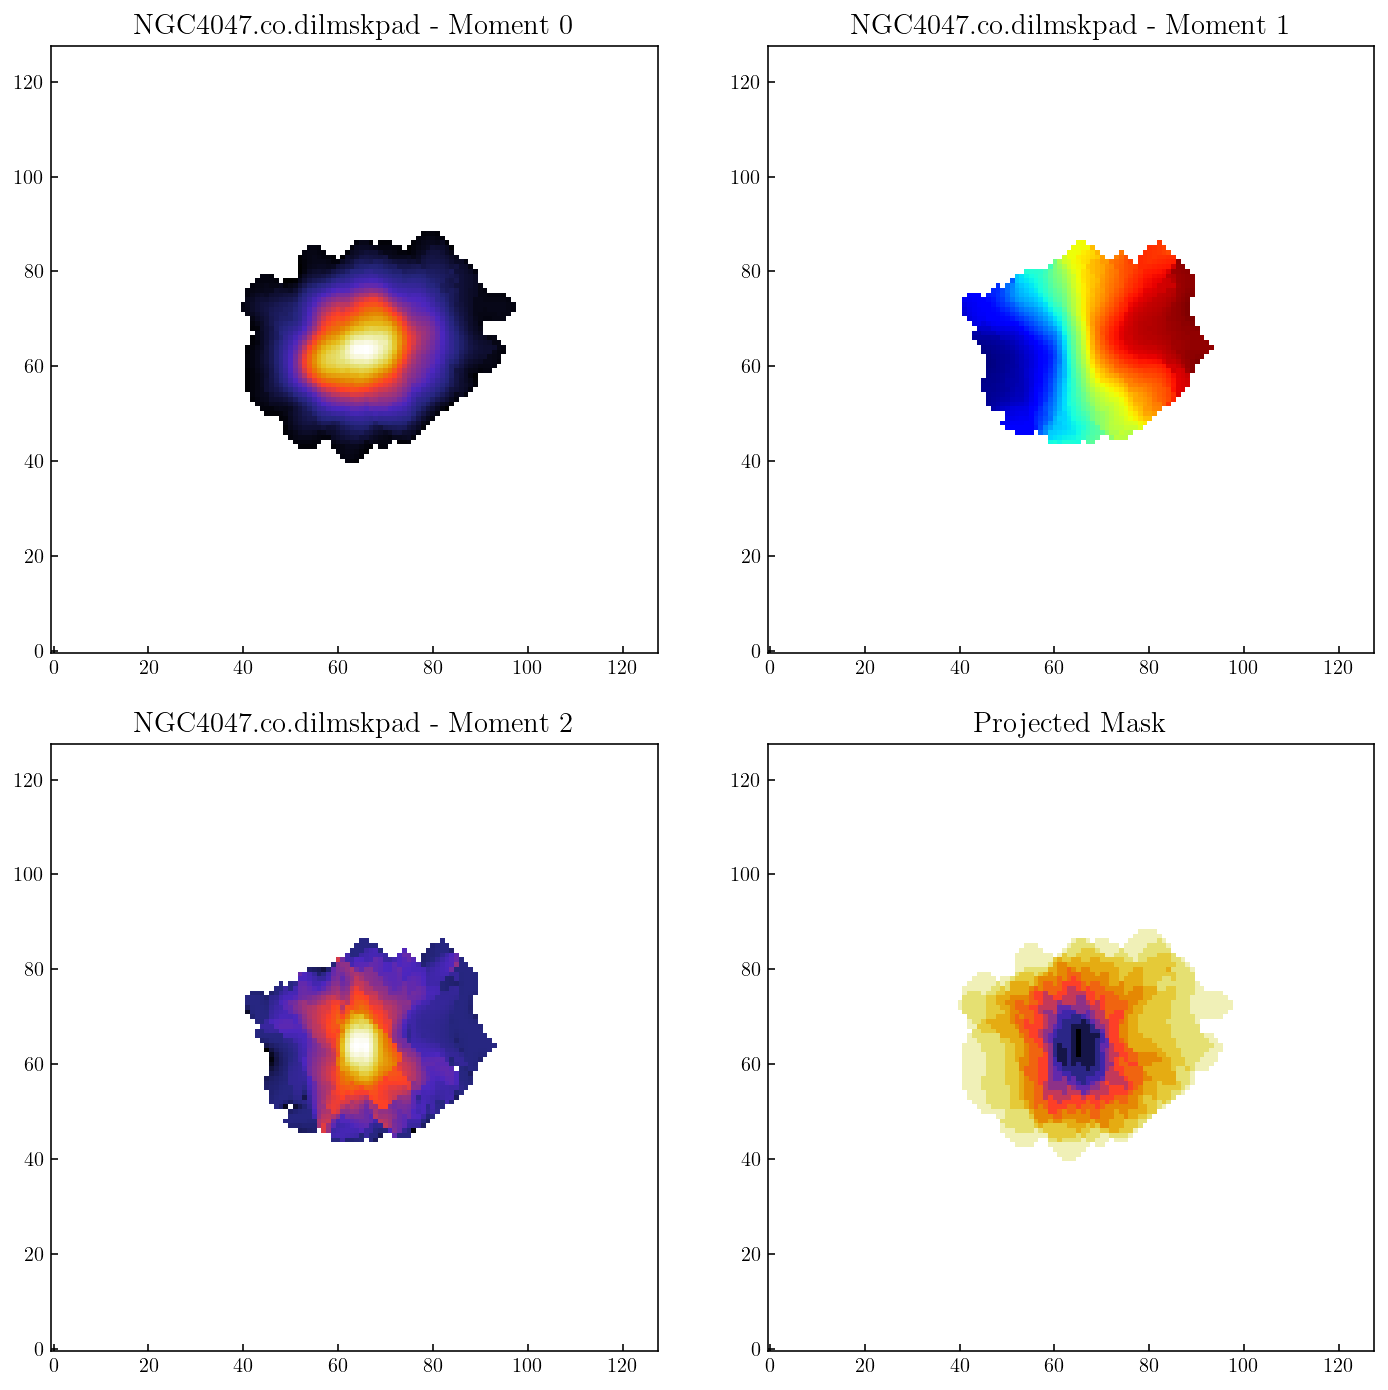

In [4]:
maskmoment(img_fits=img_fits, 
           rms_fits=rms_fits,
           snr_hi=5, snr_lo=2, minbeam=2, nguard=[2,0],
           outname='NGC4047.co.dilmskpad',outdir='./')
quadplot('NGC4047.co.dilmskpad')

## Example 2: Smooth and mask method.  Generate a mask using the 3$\sigma$ contour of a smoothed (to 10") cube.  Mask regions must span at least 2 beam areas. 


Output basename is: NGC4047.smomsk
Image cube ../../data/n4047/NGC4047.co.smo7msk.fits.gz:
SpectralCube with shape=(44, 128, 128) and unit=Jy / beam:
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 deg
 n_s:     44  type_s: VRAD      unit_s: m / s  range:  2980000.000 m / s: 3840000.000 m / s
Noise cube NGC4047.co.dilmsk.ecube.fits.gz:
SpectralCube with shape=(44, 128, 128) and unit=Jy / beam:
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 deg
 n_s:     44  type_s: VRAD      unit_s: m / s  range:  2980000.000 m / s: 3840000.000 m / s
SNR cube:
SpectralCube with shape=(44, 128, 128):
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg: 

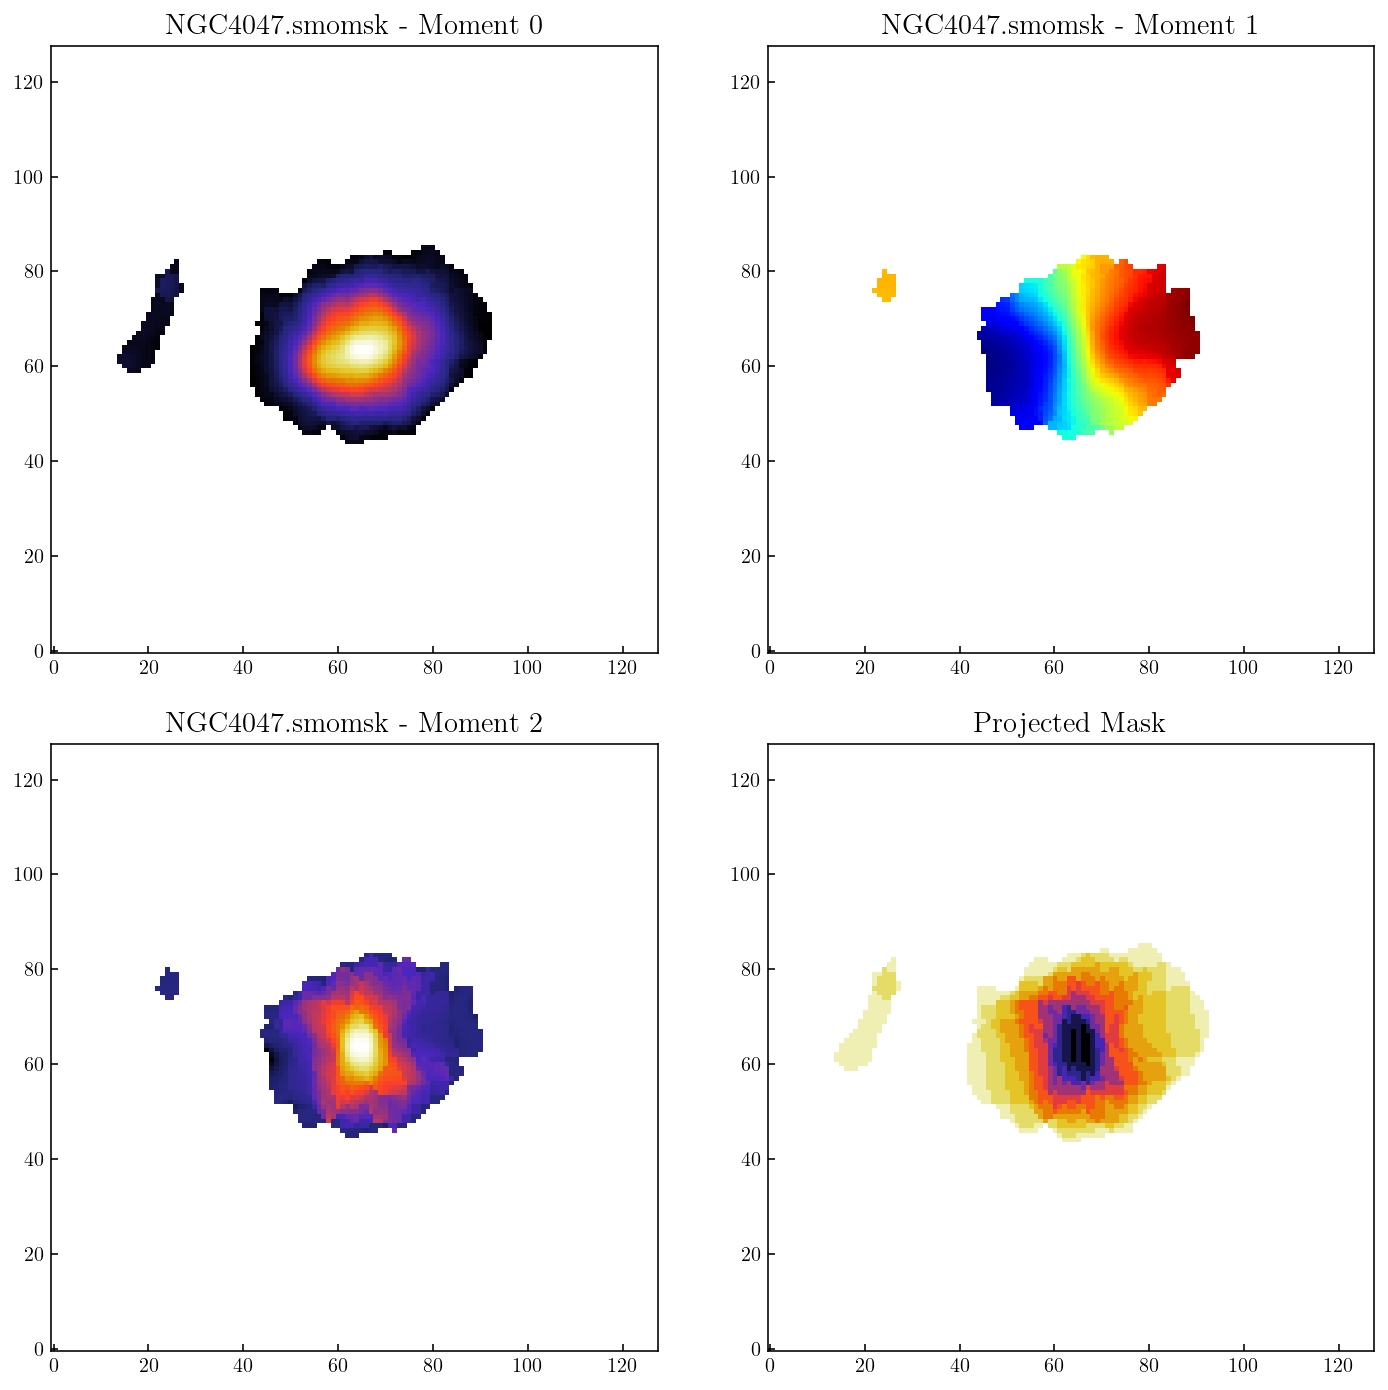

In [5]:
maskmoment(img_fits=img_fits, 
           rms_fits=rms_fits,
           snr_hi=3, snr_lo=3, fwhm=10, vsm=None, minbeam=2,
           outname='NGC4047.smomsk')
quadplot('NGC4047.smomsk')

## Example 3: Dilated smooth-and-mask.  Expand from the 4$\sigma$ to 2$\sigma$ contour of the smoothed cube. 


Output basename is: NGC4047.dilsmomsk
Image cube ../../data/n4047/NGC4047.co.smo7msk.fits.gz:
SpectralCube with shape=(44, 128, 128) and unit=Jy / beam:
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 deg
 n_s:     44  type_s: VRAD      unit_s: m / s  range:  2980000.000 m / s: 3840000.000 m / s
Noise cube NGC4047.co.dilmsk.ecube.fits.gz:
SpectralCube with shape=(44, 128, 128) and unit=Jy / beam:
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 deg
 n_s:     44  type_s: VRAD      unit_s: m / s  range:  2980000.000 m / s: 3840000.000 m / s
SNR cube:
SpectralCube with shape=(44, 128, 128):
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 de

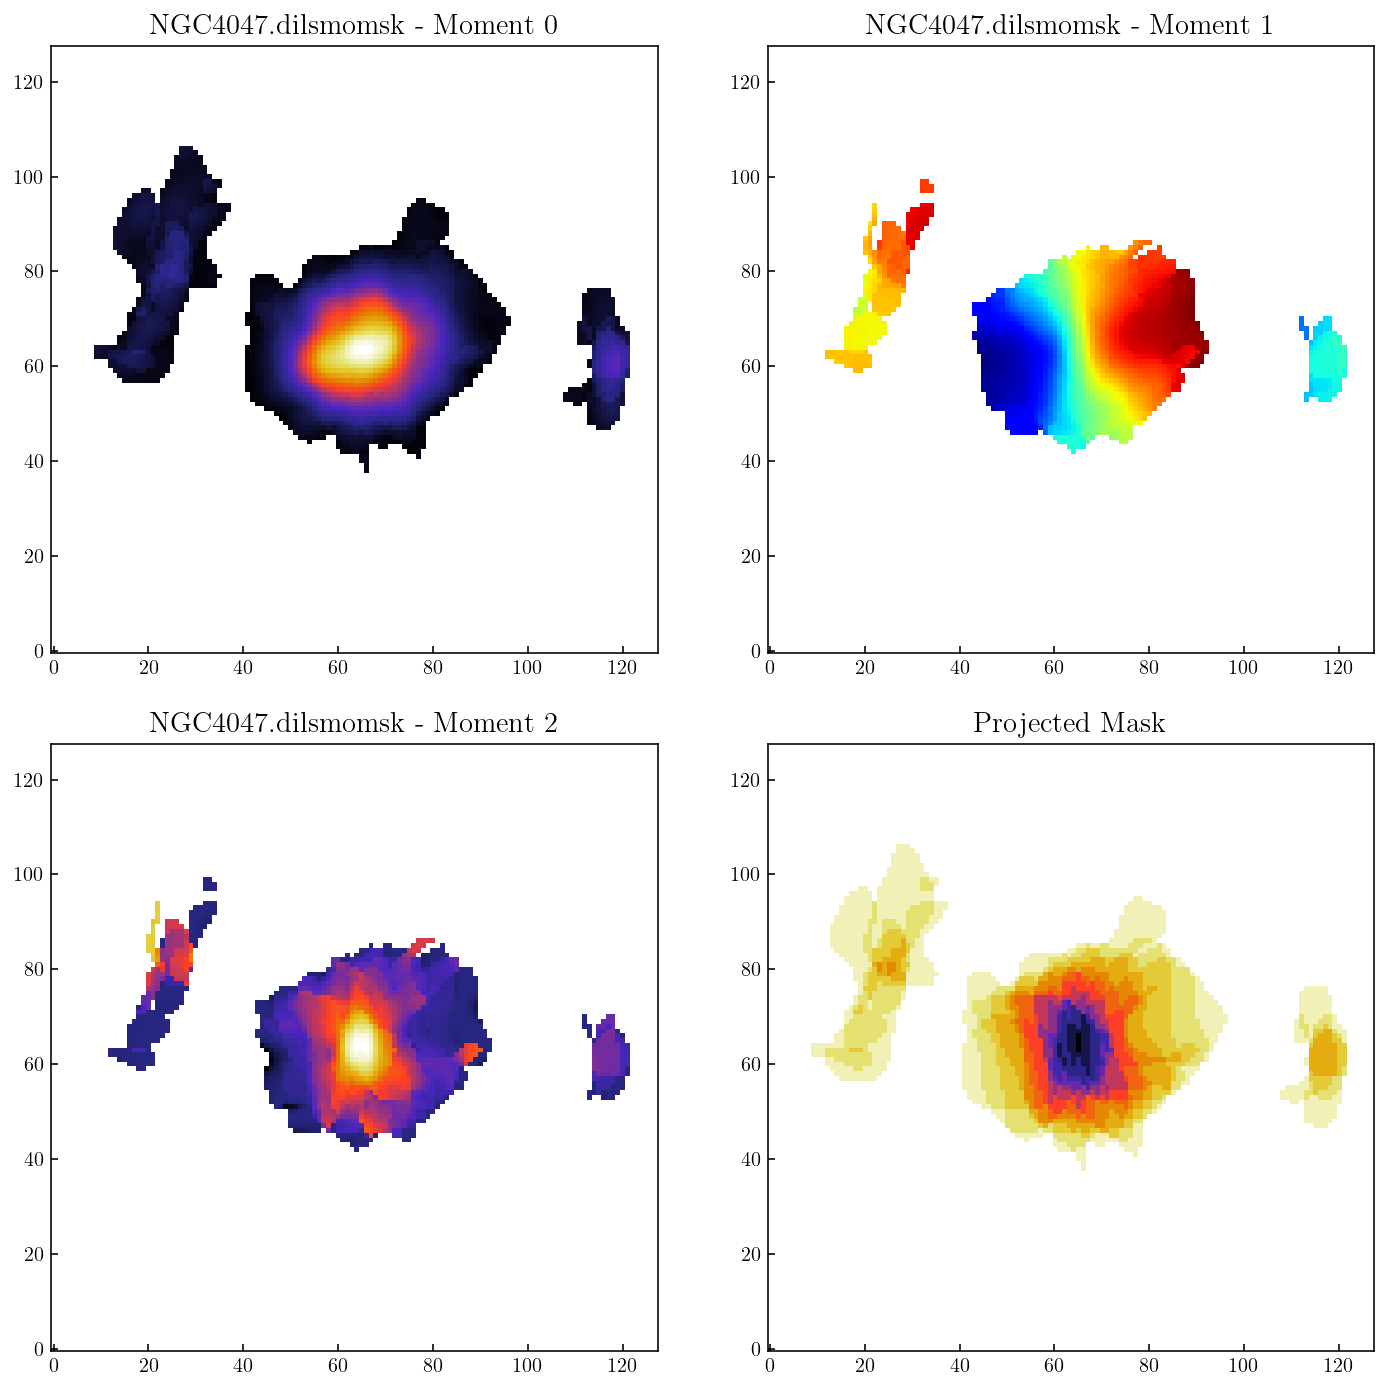

In [6]:
maskmoment(img_fits=img_fits,
           rms_fits=rms_fits,
           snr_hi=4, snr_lo=2, fwhm=10, vsm=None, minbeam=2,
           outname='NGC4047.dilsmomsk', output_2d_mask=True)
quadplot('NGC4047.dilsmomsk')

## Example 4: Apply an existing mask.  Here we apply the 2D version of the mask derived in Example 3.  Since this includes a lot of noise the results are not as good.


Output basename is: NGC4047.msk2d
Image cube ../../data/n4047/NGC4047.co.smo7msk.fits.gz:
SpectralCube with shape=(44, 128, 128) and unit=Jy / beam:
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 deg
 n_s:     44  type_s: VRAD      unit_s: m / s  range:  2980000.000 m / s: 3840000.000 m / s
Noise cube NGC4047.co.dilmsk.ecube.fits.gz:
SpectralCube with shape=(44, 128, 128) and unit=Jy / beam:
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 deg
 n_s:     44  type_s: VRAD      unit_s: m / s  range:  2980000.000 m / s: 3840000.000 m / s
Wrote./NGC4047.msk2d.flux.csv
Units of cube areJy / beam
Beam info:1.3049992288162045e-09 sr
Units of mom0 map areK km / s
Wrote ./NGC4047.msk2d.mom0.fits.gz
Wrote ./NGC4047.msk2d.mom1.fits.gz
Wrote ./NGC4047.ms

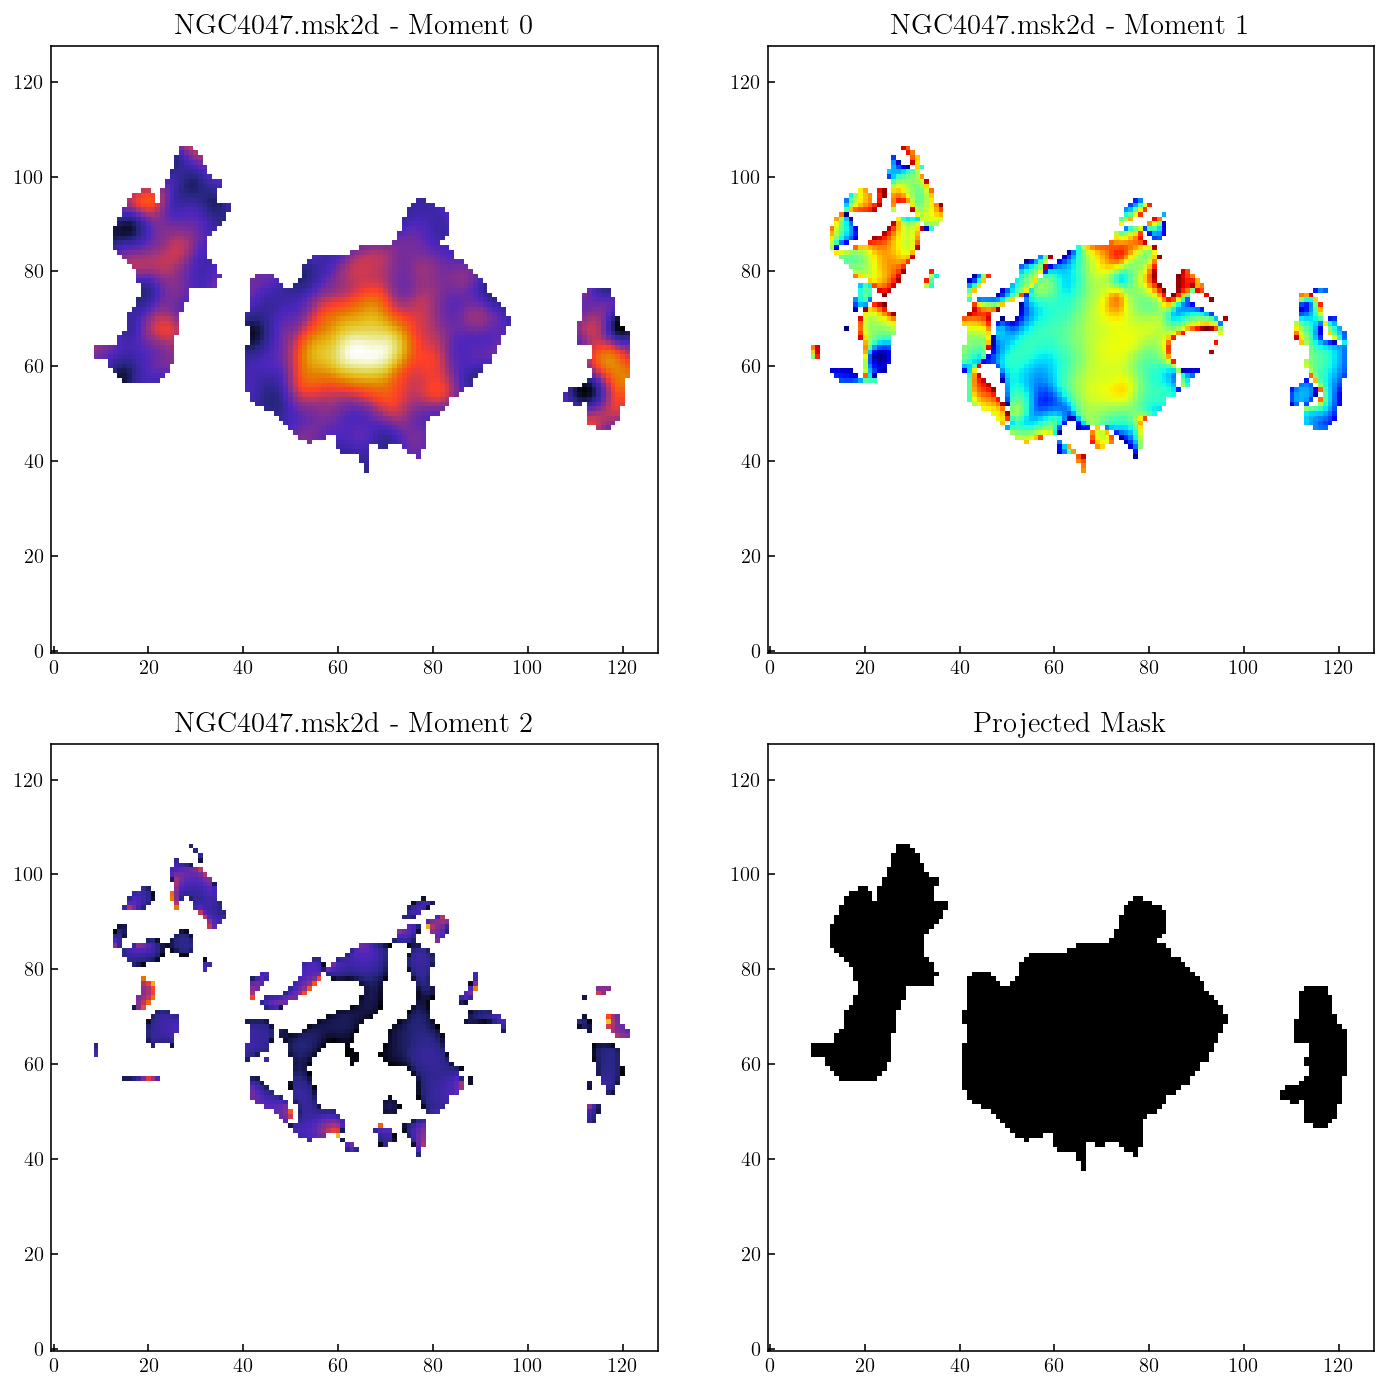

In [7]:
maskmoment(img_fits=img_fits,
           rms_fits=rms_fits,
           mask_fits='NGC4047.dilsmomsk.mask2d.fits.gz',
           outname='NGC4047.msk2d')
quadplot('NGC4047.msk2d', extmask='NGC4047.dilsmomsk.mask2d.fits.gz')

## Compare integrated spectra from the 5 masks.

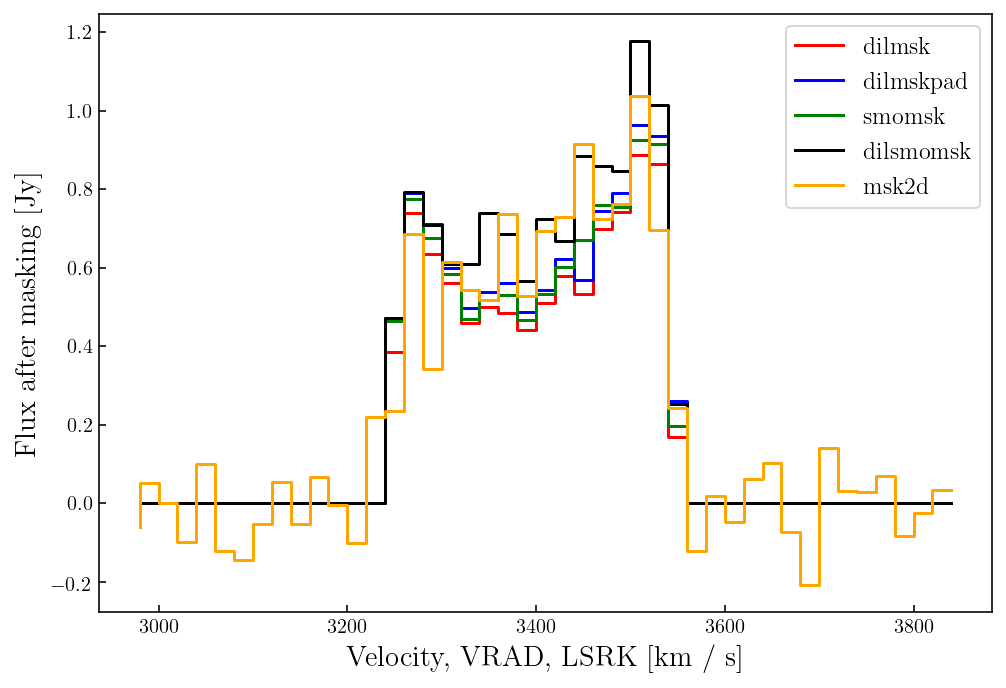

In [8]:
ex0 = Table.read('NGC4047.dilmsk.flux.csv', format='ascii.ecsv')
ex1 = Table.read('NGC4047.dilmskpad.flux.csv', format='ascii.ecsv')
ex2 = Table.read('NGC4047.smomsk.flux.csv', format='ascii.ecsv')
ex3 = Table.read('NGC4047.dilsmomsk.flux.csv', format='ascii.ecsv')
ex4 = Table.read('NGC4047.msk2d.flux.csv', format='ascii.ecsv')

figname='spec1d_comparison.pdf'

fig = plt.figure(figsize=[8,5.5])
plt.step(ex0['Velocity'],ex0['Flux'],color='r',label='dilmsk')
plt.step(ex1['Velocity'],ex1['Flux'],color='b',label='dilmskpad')
plt.step(ex2['Velocity'],ex2['Flux'],color='g',label='smomsk')
plt.step(ex3['Velocity'],ex3['Flux'],color='k',label='dilsmomsk')
plt.step(ex4['Velocity'],ex4['Flux'],color='orange',label='msk2d')
plt.legend(fontsize='large')
plt.xlabel(ex0['Velocity'].description+' ['+str(ex0['Velocity'].unit)+']',fontsize='x-large')
plt.ylabel(ex0['Flux'].description+' ['+str(ex0['Flux'].unit)+']',fontsize='x-large')

prepdir(figname)
fig.savefig(figname)